# Descripción del proyecto

Descripción del proyecto
La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

## DESCRIPCIÓN DE LOS DATOS

Instrucciones para completar el proyecto
Paso 1. Descargar los datos
Model Fitness te aportó archivos CSV que contienen los datos sobre la cancelación de un mes en concreto e información del mes que lo precedía. El dataset incluye los siguientes campos:

In [1]:
#Importar librerias
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
#from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Importar datasets
gym = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float


Campos de dataset actuales:
Datos del usuario del mes anterior
- 'gender'.
- 'Near_Location' — si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.
- 'Partner' — si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).
- Promo_friends — si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).
- 'Phone' — si el/la usuario/a aportó el número de teléfono.
- 'Age'.
- 'Lifetime' — el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.
Datos del registro de visitas y compras y datos sobre el estado actual de la membresía:
- 'Contract_period' — 1 mes, 3 meses, 6 meses o 1 año.
- 'Month_to_end_contract' — los meses que faltan hasta que expire el contrato.
- 'Group_visits' — si el/la usuario/a participa en sesiones grupales.
- 'Avg_class_frequency_total' — frecuencia media de visitas por semana a lo largo de la vida del cliente.
- 'Avg_class_frequency_current_month' — frecuencia media de visitas por semana durante el mes en curso.
- 'Avg_additional_charges_total' — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.
- 'Churn' — la cancelación para el mes en cuestión

In [4]:
print(gym)

      gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0          1              1        1              1      0                6   
1          0              1        0              0      1               12   
2          0              1        1              0      1                1   
3          0              1        1              1      1               12   
4          1              1        1              1      1                1   
...      ...            ...      ...            ...    ...              ...   
3995       1              1        1              0      1               12   
3996       0              1        0              0      1                1   
3997       1              1        1              1      1               12   
3998       0              1        1              1      1                6   
3999       1              0        1              0      0               12   

      Group_visits  Age  Avg_additional_charges_tot

## ANÁLISIS EXPLORATORIO DE DATOS (EDA)


In [5]:
#Leemos las columnas
gym.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

Como podemos observar tenemos combinación de de mayusculas y minusculas, pasaremos todas las columnas por un bucle para que todas queden bajo el mismo formato.



In [6]:
#Se crea lista para almacenar los nuevos nombres
gym_new_name_col=[]

#Se crea bucle para iterar los nombres

for old_name in gym.columns:
    name_stripped = old_name.strip()
    name_lowered = name_stripped.lower()
    name_no_spaces = name_lowered.replace(' ', '_')
    gym_new_name_col.append(name_no_spaces)
#Se reemplazan los nombres con la lista que contiene los nuevos
gym.columns= gym_new_name_col
gym.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

### ¿contiene alguna característica ausente?

In [7]:
#Revisamos si tenemos valores ausentes
gym.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

No se encontraron valores ausentes por lo que podemos usar todos nuestros datos.

In [8]:
gym.duplicated().sum()

0

Tampoco tenemos valores duplicados en este dataframe

### Estudia los valores promedio y la desviación estándar (utiliza el método describe()).

In [9]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


### Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).

In [10]:
#Agrupamos con groupby la columna churn para posteriormente separar los usuarios suscritos y los que no estan suscritos
gym_grouped= gym.groupby('churn')
gym_grouped.mean()


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


A simple vista podemos observar que las personas que se encuentran suscritas mas del 50% forman parte del programa partner y en su mayoria adquieren membresias por mayor tiempo. 
A diferencia de los no suscritos que contratan por menos tiempo y solo el 30% pertenece a un partner.

In [11]:
#Separamos los datos en dos dataframes uno para los usuarios sucritos y otro para los no suscritos
subscribed = gym_grouped.get_group(0)
unsubscribed = gym_grouped.get_group(1)

### Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

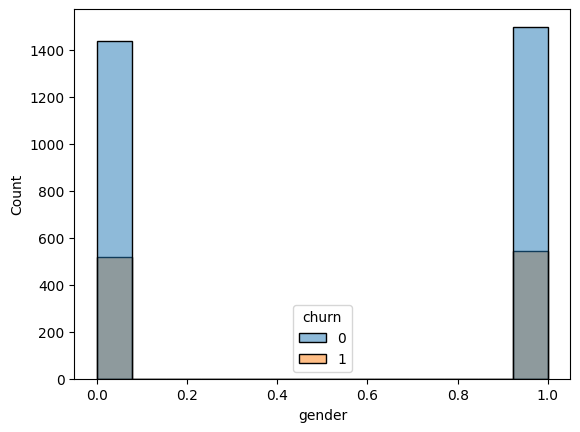

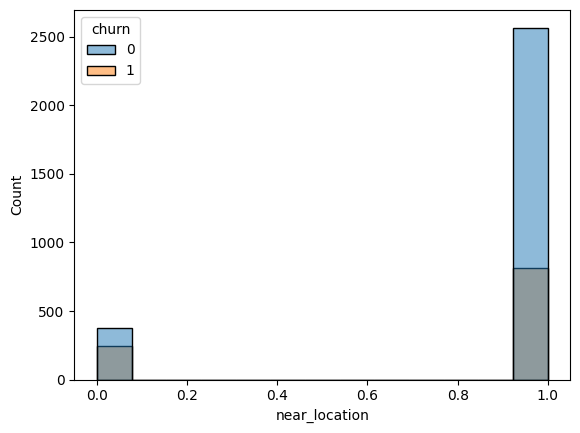

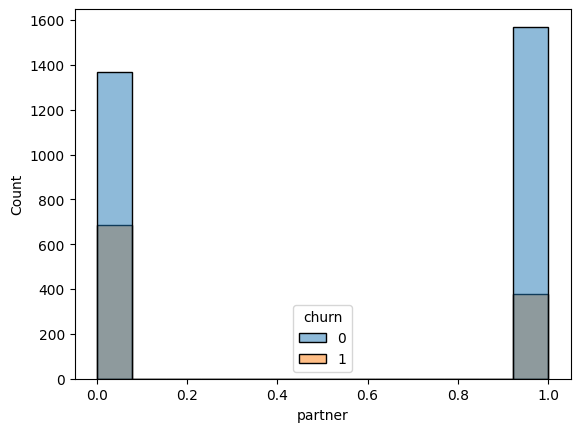

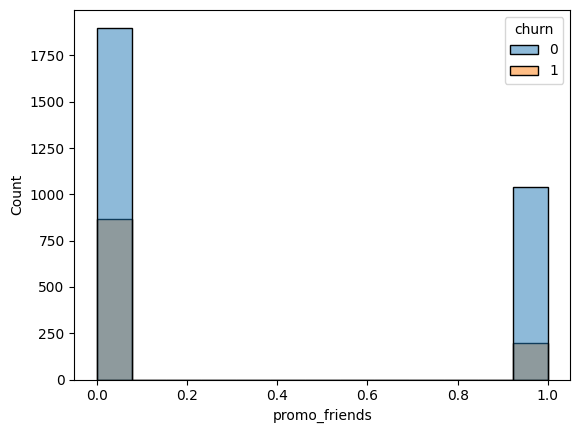

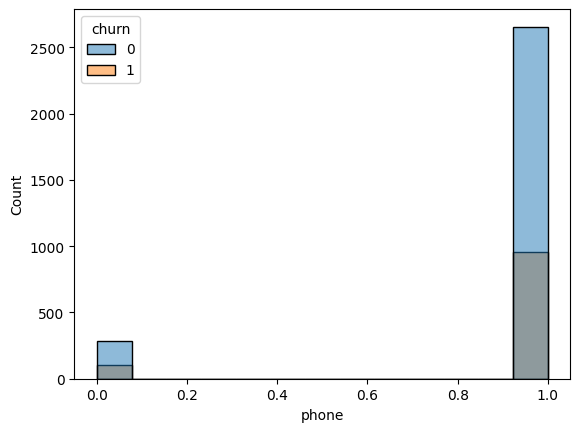

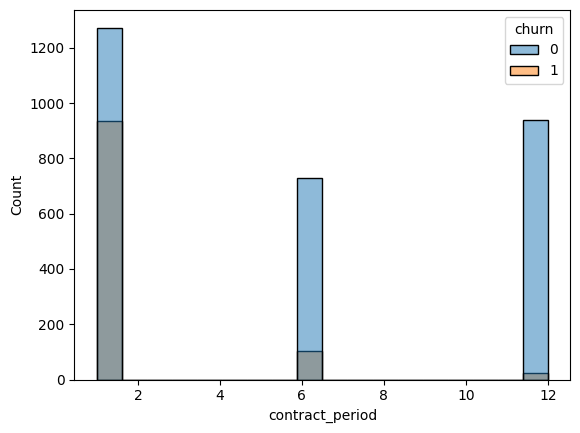

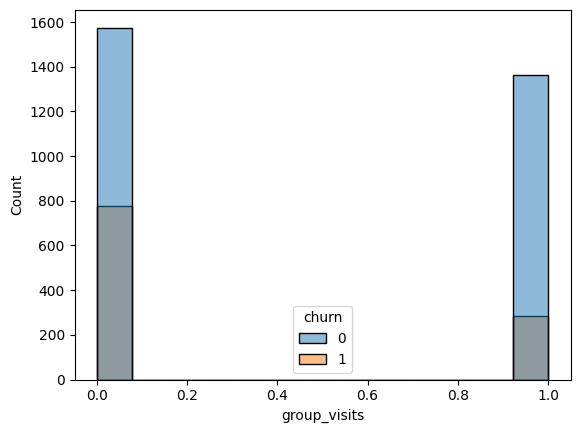

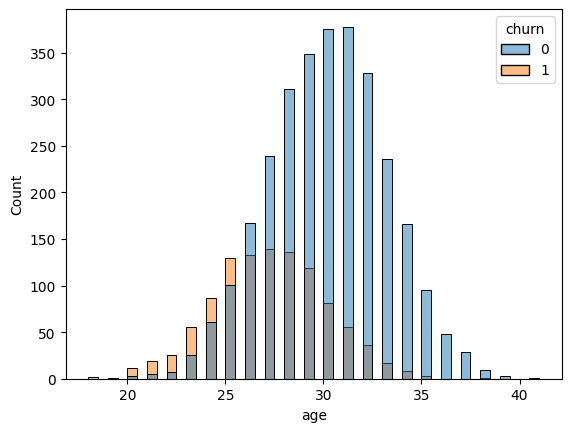

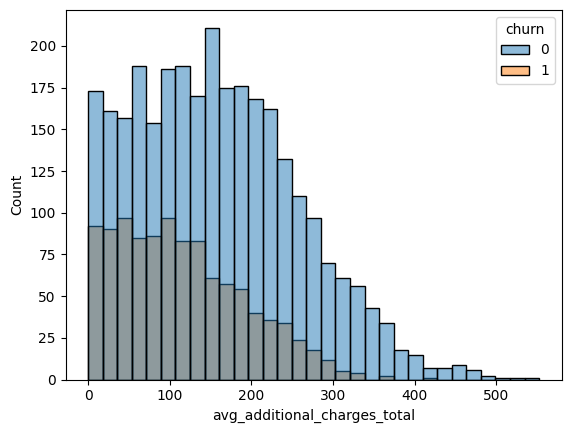

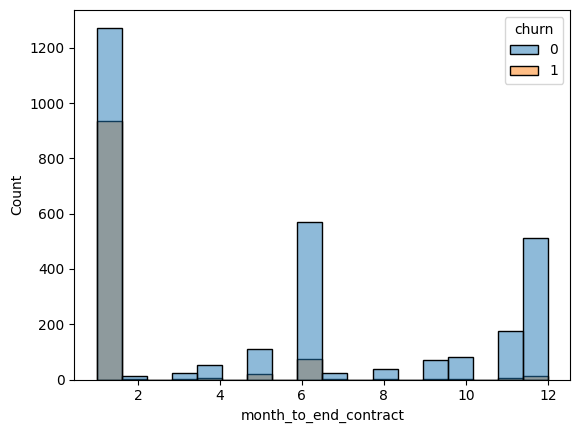

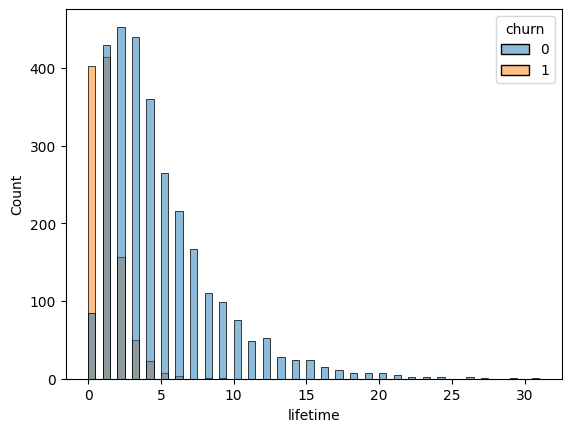

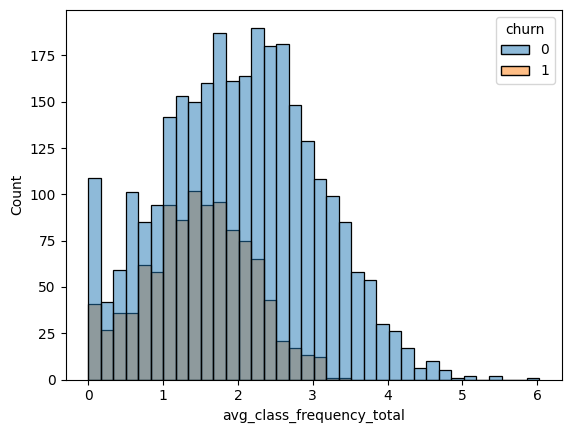

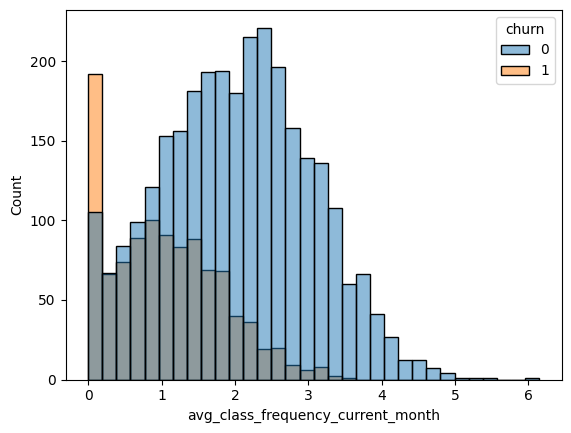

In [12]:
# Se crea un bucle para graficar cada una de las distribuciones.
for col in gym.drop('churn', axis=1).columns:
    sns.histplot(data= gym, x=gym[col], hue='churn')
    plt.show()

* **partner:** Para este grafico contamos que hay un mayor porcentaje de usuarios no suscritos que no cuentan con el descuento de partner. Esto nos puede ser útil para el departamento de marketing para aumentar la retención de esos usuarios.  


* **Promo_friends:** Tenemos que son muy pocos los usuarios que utilizan esta promoción.


* **Phone:** En este gráfico podemos observar que en ambos grupos, los usuarios dieron su número de teléfono, por lo que puede ser un excelente canal para que marketing haga llegar promociones o eventos.  


* **contract_period:** En este grafico podemos observar que la mayoría de los usuarios abandonan tras el primer mes, por lo que se pueden ofrecer promociones para contratos por mayor cantidad de meses.  


* **group_visits:** Se puede observar que la mayoría de los usuarios que no están suscritos no suelen participar en actividades de grupos.  


* **Age:** En este histograma podemos observar que la población de la gente que no se encuentra suscrita tiende a ser una población joven. Mientras que los usuarios suscritos suelen tener una media superior a los 30 años. Con esta información se podría ofrecer promociones a estudiantes universitarios, ya que aproximadamente es la edad de un estudiante universitario.


* **avg_additional_charges_total:** En ambas poblaciones ninguna de las dos suele hacer gastos superiores a los 300 usd en el mes.


* **month_to_end_contract:** En este caso podemos observar que tenemos una cantidad grande de usuarios prontos a que su membresía caduque por lo que se deben tomar acciones prontas.  


* **lifetime:** Podemos obsevar que el punto critico en las cancelaciones de membresías son en los primeros dos meses.


* **avg_class_frecuency_total:** Podemos observar que la media para los usuarios que no están suscritos es de 1 a 2 días a la semana durante su suscripción.Mientras que los usuarios que continúan suscritos su media de visitas se encuentra entre 2 a 3 a la semana durante la duración de suscripción.

* **avg_class_frequency_current_month:** En el caso de la población que no esta suscrita, tenemos que una gran parte solo visito el gimnasio un promedio de una vez a la semana durante un mes, mientras que para los suscritos fue un promedio de 2 a 3 visitas a la semana durante el ultimo mes.

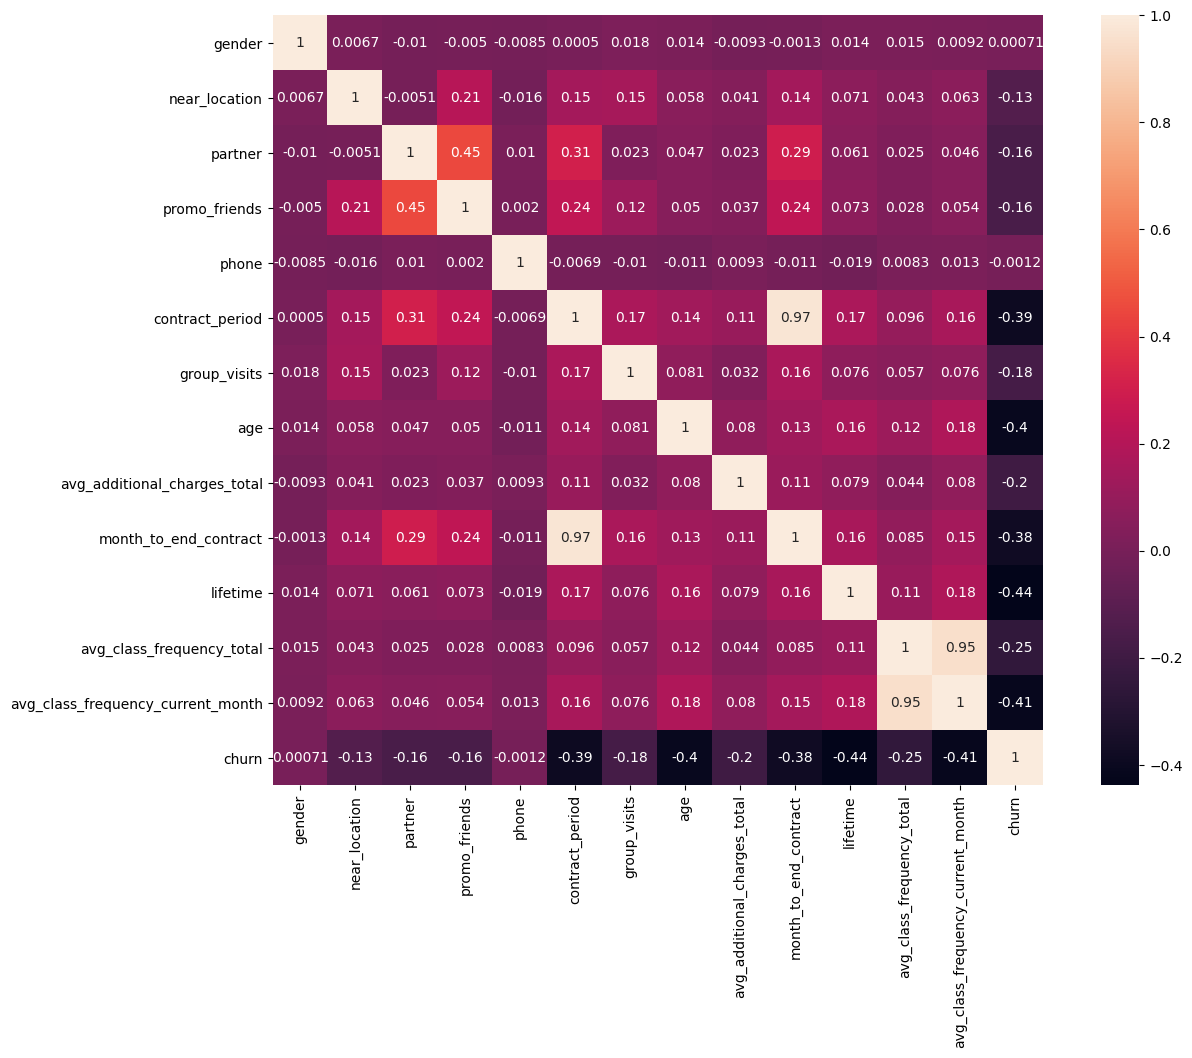

In [13]:
# Se crea una matriz de correlación.

corr_m=gym.corr()

# Se crea un grafico de calor para la matriz de correlación. 
fig, ax = plt.subplots(figsize=(15, 10))

# Traza el mapa de calor anotado para la matriz de correlación
sns.heatmap(corr_m, annot=True, square=True, ax=ax)

plt.show()


Como podemos observar en el mapa de calor las caracteristicas con mayor correlación son:
* Con 95% month to end contract con el periodo de contrato, 
* Con 95% avg class frequency total y avg class frecuency current month
* Con 45% promo friends y partner

## MODELO DE PREDICCIÓN DE CANCELACIÓN DE USUARIOS

In [14]:
# Se crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario/a 
# el mes siguiente ('churn').

# define la función que podrá generar nuestras métricas
def print_all_metrics(y_true, y_pred, y_proba, title = 'Métricas de clasificación'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))


# Divide los datos en caracteristicas y la variable objetivo

X=gym.drop('churn',axis=1)
y=gym['churn']

# Se dividen los valores de entrenamiento y los de prueba ocupando del 80/20 y randomState para que sea reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

### Entrena el modelo en el set de entrenamiento con dos métodos:

#### Regresión logística

# define el algoritmo para el modelo de regresión logística
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
# utiliza el modelo entrenado para hacer previsiones
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
# muestra todas las métricas
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Métricas de regresión logística:')

#### Bosque aleatorio

# define el algoritmo para el nuevo modelo de random forest
rf_model = RandomForestClassifier(n_estimators=100,random_state=0)
# entrena el modelo de random forest
rf_model.fit(X_train_st, y_train)
# utiliza el modelo entrenado para hacer previsiones
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
# muestra todas las métricas
print_all_metrics(y_test, rf_predictions, rf_probabilities, title='Métricas de random forest:')

Métricas de regresión logística:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
Métricas de random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


Evaluando la exactitud, precision y recall para ambos modelos, obtenemos que la regresión logística tiene mejor presición que el bosque aleatorio, en recall solo tienen una pequeña diferencia entre modelo y modelo. Por lo que podemos concluir que la regresión logística es el modelo que debemos seleccionar para hacer predicciones.

## CREAR CLÚSTERES DE USUARIOS

In [15]:
### Se identifican los clústeres de usuarios/as

#Se estandarizan los datos
sc = StandardScaler()
x_sc = sc.fit_transform(gym)

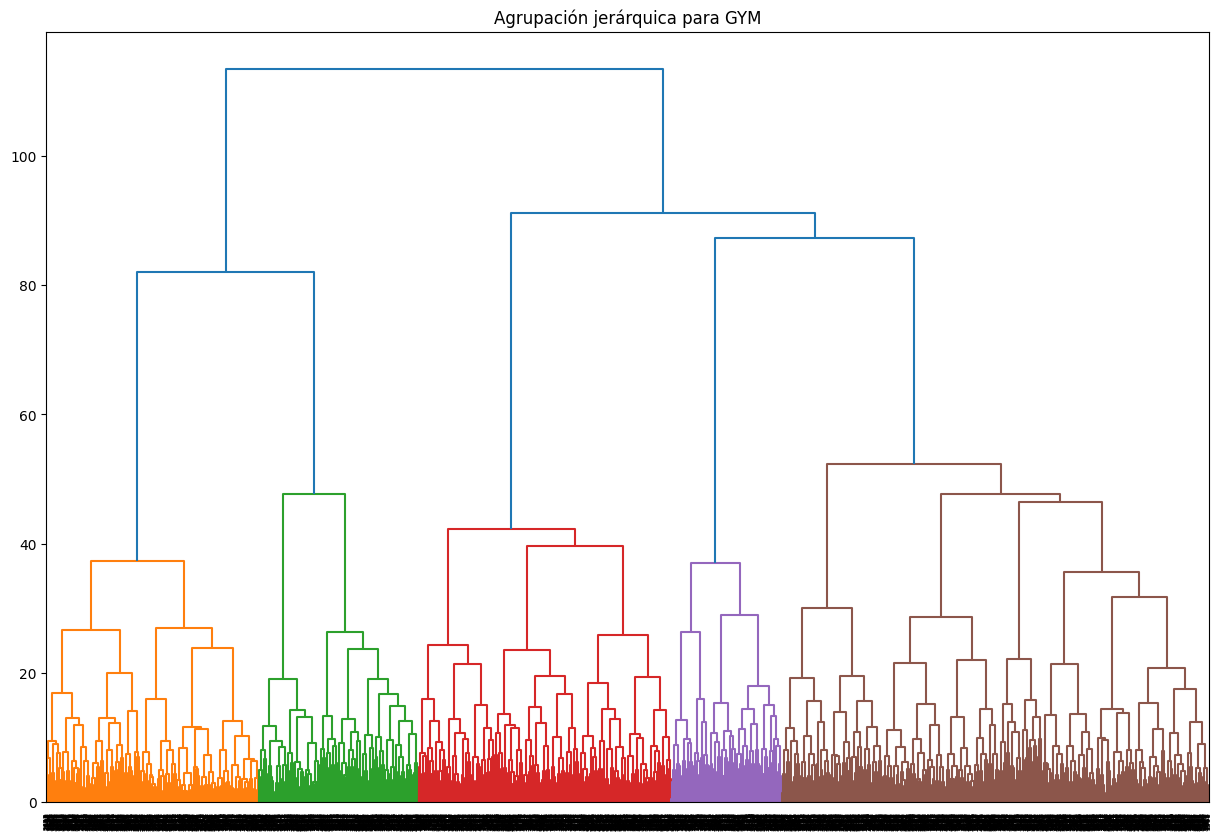

In [16]:
# Se crea una matriz de distancias 
linked = linkage(x_sc, method = 'ward')
# Se grafica la matriz trazando un dendrograma
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para GYM')
plt.show()

Obteniendo nuestro dendrograma obtenemos 5 grupos diferentes de diferentes colores que sera el número de clusteres que crearemos apartir de este dato.

In [17]:
# Se define el modelo K-means con 5 clusteres
km = KMeans(n_clusters=5, random_state=0)
# Se predice los clusteres
labels = km.fit_predict(x_sc)

# almacena etiquetas de clúster en el campo de nuestro conjunto de datos
gym['cluster_km'] = labels

# obtiene las estadísticas de los valores medios de las características por clúster
gym.groupby(['cluster_km']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.503676,0.000000,0.459559,0.075368,0.917279,2.069853,0.211397,28.522059,132.741216,1.950368,2.757353,1.706629,1.515890,0.450368
1,0.492829,0.936115,0.764016,0.534550,0.919166,10.447197,0.516297,29.962190,161.853561,9.477184,4.833116,2.788103,2.786919,0.007823
2,0.507917,1.000000,0.323995,0.213155,0.903776,1.546894,0.287454,26.926918,113.173051,1.500609,1.031669,1.449720,1.037592,0.961023
3,0.521186,0.996610,0.282203,0.208475,0.904237,1.882203,0.452542,30.237288,157.988625,1.794915,4.923729,2.203432,2.207359,0.003390
4,0.518895,0.968023,0.744186,0.526163,0.873547,8.859012,0.534884,29.728198,162.907495,8.155523,4.411337,0.957744,0.943967,0.024709


### Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?
Traza distribuciones de características para los clústeres. ¿Notas algo?
Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

In [18]:
# Se calcula la tasa de cancelación para cada clúster.
churn_rate_by_cluster = gym.groupby('cluster_km')['churn'].mean()
print(churn_rate_by_cluster)

cluster_km
0    0.450368
1    0.007823
2    0.961023
3    0.003390
4    0.024709
Name: churn, dtype: float64


El grupo 2 es el que tiene mayor numero de cancelaciónes con un 96% de cancelaciones. Por otro lado, el grupo 1 y 3 son los mas leales con menos del 1% de cancelaciones. 
Con base en estos datos, podriamos crear perfiles para clientes que son mas propensos a cancelar su membresia y cuales son los clientes que se vuelven más leales. 

Tenemos que para el grupo 2 el 100% vive cerca de las instalaciones d el gym, solo el 28% de participa en actividades grupales, solo el 32% pertenece a un partner y el 21% y tienden a asistir uno o dos meses al gimnasio. Además que tenemos que de todos los cluster la media de edad es la más baja.

## CONCLUSIONES

En conclusión, tenemos que el proximo mes tenemos muchos usuarios que van a terminar su suscripsión, mediante el perfil que obtenimos al realizar los clusters podriamos realizar algunas promociones para alentar a esos usuarios a renovar su suscripçión. Ofreciendo un precio menor en membresias de 6 y 12 meses.

Otro dato importante es que la población que no renueva su suscripción se encuentra entre 25 a 30 por lo que podria establecer alguna estrategia de marketing para atraer a ese sector de la población.

Por otro lado, promocionar boletines de noticias y promociones es una excelente idea ya que mas del 90% de los usuarios proporcionaron su telefono siendo un excelente canal de comunicación.

Referente al tema del modelo de predicción obtuvimos que el modelo de regresión lógistica tiene mejores métricas, con un 92% de certeza. Por lo que se concluye que es un buen modelo que nos servira para predecir.